# STOCK PRICES PREDICTION USING MACHINE LEARNING:
## Comparion between ML and Classical Statistics Methods


# OUTLINE

- Huge and Big Idea: Business.

- Visualizing data.

- RNNs: LSTM Analysis.

- ARCH and GARCH.

- Stochastic Volatility (Not used at all).

- Bibliography.

# Huge idea: Create a company (It could be an App)
![](https://www.apple.com/newsroom/images/product/app-store/Apple_App_Store_10th_anniversary_07102018_big.gif.large.gif)

PROPOSAL: blablabla

# Big Idea: Create a minimum viable product.
### Darwinex: The Trader Exchange

![](https://lh3.googleusercontent.com/proxy/Beqqk0ykTv9HIUy8-srfJCp7-I9UN3yUvF_y8WBg5jFU7NwzKqTpQmnt-7WlFq2rXvVaNnfIJfW0XfDpVpxvTKKrSIEB60QbOfZ8-wXBGJZRZeE3uA)

#1st Approach: For data (Only LSTM)

Importing Packages and data

In [ ]:
#!pip install tensorflow==1.14.
#%tensorflow_version 1.14
#from tensorflow.keras import backend 
#from keras import backend

#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#importing required ML libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#to load images from a external file in Colab
from google.colab import files
from io import BytesIO
from PIL import Image

Using TensorFlow backend.


# Analizing the S&P500 index

- It measures the stock performance of the 505 largest companies listed on stock exchanges in the USA.
- It exists since 1927 (there are a lot of data).
- It is computed daily (M-F, except for holidays).

In [ ]:
#For Colab
## File from PC DEL
#from google.colab import files
#uploaded = files.upload()
#df1 = pd.read_csv('S&P-GSPC-Daily-1927.csv')
#print(df1.head(5))

#Data extracted from Yahoo Finance
#File downloaded from: https://finance.yahoo.com/quote/%5EGSPC/history?period1=-1325635200&period2=1583539200&interval=1d&filter=history&frequency=1d
## File in Google Drive
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/Colab Notebooks/'
file = 'S&P-GSPC-Daily-1927.csv'
#dataset is the S&P500 index since 1927
#dataset = pd.read_csv(path+file, index_col='Date', parse_dates=['Date'])
dataset = pd.read_csv(path+file)#, parse_dates=['Date']) #Equal to TATAGLOBAL file
#ERROR Que el indice dice la hora i.e 0:00:00. y no debería tener eso. Advice: usar new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d') y otras cosas
dataset.head(5)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0


# Visualizing data (Close Price)

Why the S&P500 ?

- It's affected by Economy, Politics and social events (as the COVID-19).
- It's has correlation with NASDAQ, Dow Jones, Euro/USD, Oil, US Treasury securities and so on.

                 Date         Open  ...    Adj Close      Volume
Date                                ...                         
2019-12-24 2019-12-24  3225.449951  ...  3223.379883  1296540000
2019-12-26 2019-12-26  3227.199951  ...  3239.909912  2160680000
2019-12-27 2019-12-27  3247.229980  ...  3240.020020  2428670000
2019-12-30 2019-12-30  3240.090088  ...  3221.290039  3013290000
2019-12-31 2019-12-31  3215.179932  ...  3230.780029  2893810000

[5 rows x 7 columns]
Total data size:  1258
Training data size:  1006


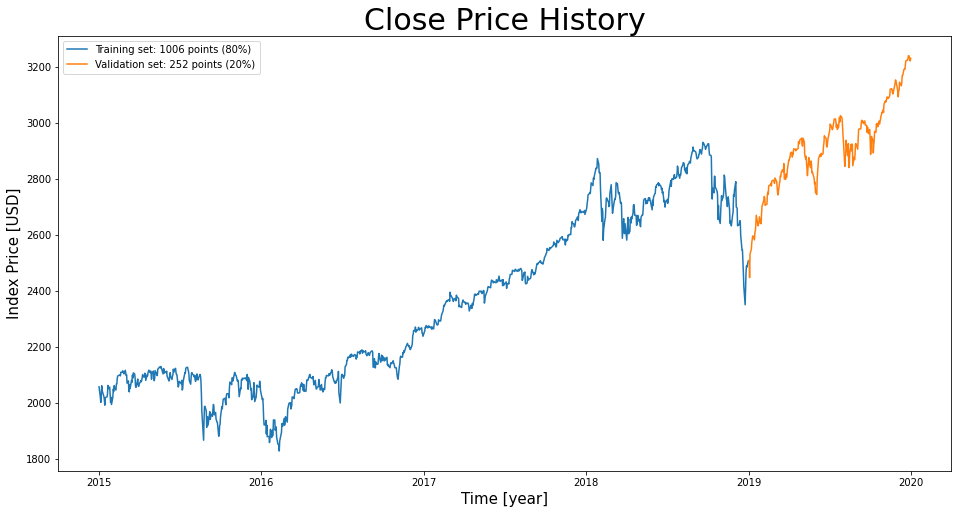

In [ ]:
#Setting date as dataframe index
dataset['Date'] = pd.to_datetime(dataset.Date,format='%Y-%m-%d')
dataset.index = dataset['Date']

#Selecting data (time interval) to study. It is call df
since = '2015'
to = '2019'
df = dataset[since:to]
#print(df.index)
print(df.tail(5))

#Data size
tsize = int(len(df)*0.8) #Training size
vsize = int(len(df)) - tsize #Validation size
print("Total data size: ",len(df))
#print(len(df)*0.8)
print("Training data size: ",tsize)

#Plotting data
plt.figure(figsize=(16,8))
plt.plot(df['Close'][:tsize], label='Training set: {0:.0f} points (80%)'.format(tsize))
plt.plot(df['Close'][tsize:], label='Validation set: {0:.0f} points (20%)'.format(vsize))
#plt.plot(df['Close'])
plt.title("Close Price History", size = 30)
plt.xlabel("Time [year]", size = '15')
plt.ylabel("Index Price [USD]", size = '15') 
plt.legend()
plt.show()

# RNNs: LSTM Analysis

![Image taken from Miguel Sotaquirá](https://drive.google.com/uc?id=1quve9C-aUk0Ivi2B2jSkTikpL5i7dwEy)

In [ ]:
#Selecting data (dataframe) to analyze
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close']) 
for i in range(0,len(df)):
    new_data['Date'][i] = df['Date'][i]
    new_data['Close'][i] = df['Close'][i]

#print(new_data.head(5)['Date'])
#print(new_data.head(5))

#Setting date as index
new_data.index = new_data.Date 
new_data.drop('Date', axis=1, inplace=True) #deleting date column
print(new_data.head(5))
#print(new_data.index)

#creating train and test sets
price = new_data.values
#print(price)

#Scaling training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(price)

              Close
Date               
2015-01-02   2058.2
2015-01-05  2020.58
2015-01-06  2002.61
2015-01-07   2025.9
2015-01-08  2062.14
[[2058.199951]
 [2020.5799559999998]
 [2002.609985]
 ...
 [3240.02002]
 [3221.290039]
 [3230.780029]]


In [ ]:
#Creating training and testing data for the RNN

#Training data
#input(x): 'time_step' sequential data - output(y): 1 data (the next to the 60 previous data)
x_train, y_train = [], []
time_step = 60
for i in range(time_step,tsize):
    x_train.append(scaled_data[i-60:i,0]) #x
    y_train.append(scaled_data[i,0]) #y
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
#print(x_train)

#Validation data
inputs = new_data[len(new_data) - vsize - 60:].values #predicting values, using past 60 from the train data
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

#Note: train and validation data are overlaping each other in the first "time_step" (60) validation data 

x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Parameters of the LSTM neural network
na = 50 #Neurons in the LSTM network
dim_input=(x_train.shape[1],1)
dim_output=1

#Creating RNN
model = Sequential()
#model.add(LSTM(units=na, input_shape=dim_input))
model.add(LSTM(units=na, return_sequences=True, input_shape=dim_input))
model.add(LSTM(units=na)) #This and previous layer is to avoid the "blablabla" error
model.add(Dense(units=dim_output))
model.compile(loss='mean_squared_error', optimizer='adam')

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#TRAINING
model.fit(x_train, y_train, epochs=20, batch_size=32) #What do epochs and batch_size mean in this case ?

#TESTING (PREDICTING)
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)
#print(len(x_test))
#print(len(closing_price))

Epoch 1/10
946/946 [==============================] - 2s 2ms/step - loss: 8.0001e-04
Epoch 2/10
946/946 [==============================] - 2s 2ms/step - loss: 8.0771e-04
Epoch 3/10
946/946 [==============================] - 2s 2ms/step - loss: 7.2286e-04
Epoch 4/10
946/946 [==============================] - 2s 2ms/step - loss: 7.0335e-04
Epoch 5/10
946/946 [==============================] - 2s 2ms/step - loss: 7.1023e-04
Epoch 6/10
946/946 [==============================] - 2s 2ms/step - loss: 7.0569e-04
Epoch 7/10
946/946 [==============================] - 2s 2ms/step - loss: 6.5341e-04
Epoch 8/10
946/946 [==============================] - 2s 2ms/step - loss: 6.7440e-04
Epoch 9/10
946/946 [==============================] - 2s 2ms/step - loss: 6.3050e-04
Epoch 10/10
946/946 [==============================] - 2s 2ms/step - loss: 6.5557e-04


In [ ]:
#WHY DOES IT IMPROVE IF I TRAIN THE MODEL MANY TIMES (RUN THE TRAINING CELL MANY TIMES)??
rmsLSTM=np.sqrt(np.mean(np.power((price[tsize:,:]-closing_price),2)))
rmsLSTM
#print(closing_price)

36.306655539083536

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0, 0.5, 'Index Price [USD]')

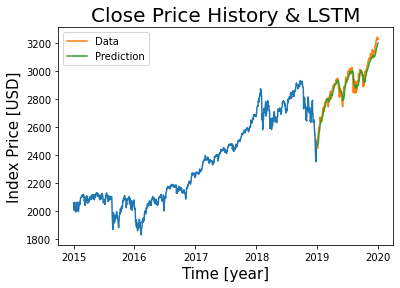

In [ ]:
#for plotting
train = new_data[:tsize]
valid = new_data[tsize:]
valid['Predictions'] = closing_price
#print(valid)
#print(train)
plt.plot(train['Close'])
plot = plt.plot(valid[['Close','Predictions']])
#plt.annotate("rms = "+str(rmsLSTM), xy=(data.index[1],300), size = 15)
plt.legend(plot, ("Data","Prediction"))
plt.title("Close Price History & LSTM", size = 20)
plt.xlabel("Time [year]", size = '15')
plt.ylabel("Index Price [USD]", size = '15') 


Text(0, 0.5, 'Index Price [USD]')

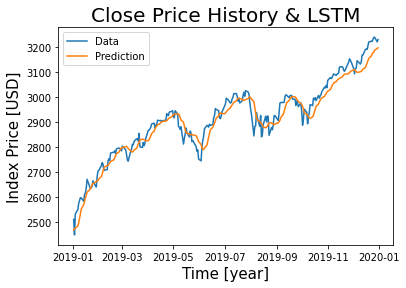

In [ ]:
 plot = plt.plot(valid[['Close','Predictions']])
plt.legend(plot, ("Data","Prediction"))
plt.title("Close Price History & LSTM", size = 20)
plt.xlabel("Time [year]", size = '15')
plt.ylabel("Index Price [USD]", size = '15') 

## Questions

1. What do you think about making all in Colab ?? (Google could steal our algoriths, code, etc)

2. Why the division: 80% data = training and 20% data = validation. ?

3. Should I analize the S&P500 since its begining ? or since last XXX years ?

4. LSTM does not take into account the time interval. I mean, not always series is daily (for instance, on weekends).

##IDEAS FOR THE RNN - LSTM:

- Play with the ML Model, changing the number of layers, neurons, size of the sample etc

- Run the model with less and with more neurons than "time_step" data, and check it. Why (apparently) is not a correlation between the number of neurons and the number of input data ("time_step") ? (See the "Hola" image)

- Try to predict the WHOLE (the whole series) behaviour based on the predictions made by the RNN.

![HE USES IMAGES, NOT DATA - Source: https://agenciadenoticias.unal.edu.co/detalle/article/modelo-algoritmico-predeciria-precios-de-las-acciones.html
](https://drive.google.com/uc?id=11b8kPzbz-LQPbu_kC9VcIVKvg4PKDszx)

Bibliography (links):

- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/
- https://www.youtube.com/watch?v=2BrpKpWwT2A&list=PLQVvvaa0QuDcOdF96TBtRtuQksErCEBYZ&index=1

- https://towardsdatascience.com/using-lstms-for-stock-market-predictions-tensorflow-9e83999d4653

- https://github.com/llSourcell/Reinforcement_Learning_for_Stock_Prediction/blob/master/README.md


# Heartfelt Thanks

![](https://moreliactiva.com/wp-content/uploads/2018/09/cerati.jpg)

# BIB For GARCH

- https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/
- https://pyflux.readthedocs.io/en/latest/garch.html
- Profesor and group: https://www3.cs.stonybrook.edu/~skiena/
- Video from a course: https://www.youtube.com/watch?v=pspVn0OopME&list=PLNlxfQ7JYooFAmraP3nmRKejo8m4GkprS&index=14
-

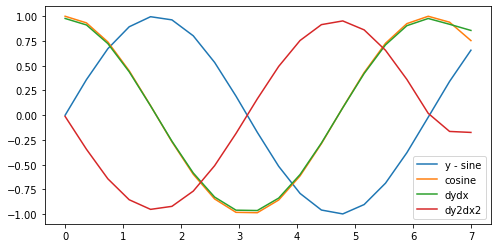

In [ ]:
#ANALYSIS WITH DERIVATIVES
x = np.linspace(0,7,20)
y = np.sin(x)
z = np.cos(x)
dydx = np.gradient(y,x)
dy2dx2 = np.gradient(dydx,x,edge_order=2)
#print(dydx)
rcParams['figure.figsize'] = 8,4
plt.plot(x,y, label="y - sine")
plt.plot(x,z, label="cosine")
plt.plot(x,dydx, label="dydx")
plt.plot(x,dy2dx2, label="dy2dx2")
plt.legend()